# Churn Prediction Using Classification

In here, I am going to use two methods, using the actual samples and using resampling method to make each class have equal samples. The expectation when using resampling method is to avoid bias because when testing the models with actual samples, they tend to predict all samples to not churn (because the data contain more `0` class).

# Building Models

In [57]:
# importing libraries
# main libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# model building libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

In [2]:
data = pd.read_csv('PrepChurnData.csv')
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,1,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,1,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,1,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,0,0,0,1


In [3]:
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary',
            'Satisfaction Score','Point Earned','Female','Male','France','Germany','Spain']
target = 'Exited'

In [4]:
train, test = train_test_split(data, test_size=0.2,random_state=42)

In [5]:
X_train = train[features]
y_train = train[target].astype(str)
X_test = test[features]
y_test = test[target].astype(str)

In [6]:
print('Number of training samples:', X_train.shape[0])
print('Number of test samples:', X_test.shape[0])

Number of training samples: 8000
Number of test samples: 2000


In [70]:
def plot_cm(model, model_name):
    yhat = model.predict(X_test)
    matrix = confusion_matrix(yhat, y_test)
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest')
    ax.set(title='Confusion Matrix for '+model_name, xlabel='Predicted values', ylabel='Actual Values',
           xticklabels=['Did not churn', 'Churn'], yticklabels=['Did not churn', 'Churn'])
    plt.show()

In [25]:
def build_model(model_name, parameters):
    pipe = Pipeline([('scaler', StandardScaler()),('model',model_name)])
    pipe_cv = GridSearchCV(pipe, param_grid=parameters, refit=True)
    pipe_cv.fit(X_train,y_train)
    return pipe_cv

In [54]:
def evaluate(model_name):
    print('The best parameters are:', model_name.best_params_)
    print('The best score is:', model_name.best_score_)
    yhat = model_name.predict(X_test)
    print('The classification scores are:')
    print(classification_report(yhat, y_test))

## Logistic Regression

In [27]:
parameters = {'model__C':[0.01,0.1,1], 
              'model__penalty':['l2'], 
              'model__solver':['lbfgs','newton-cholesky']}
LR_model = build_model(LogisticRegression(random_state=42), parameters)

{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

In [55]:
evaluate(LR_model)

The best parameters are: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
The best score is: 0.8105
The classification scores are:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1875
           1       0.18      0.58      0.28       125

    accuracy                           0.81      2000
   macro avg       0.58      0.70      0.59      2000
weighted avg       0.92      0.81      0.85      2000



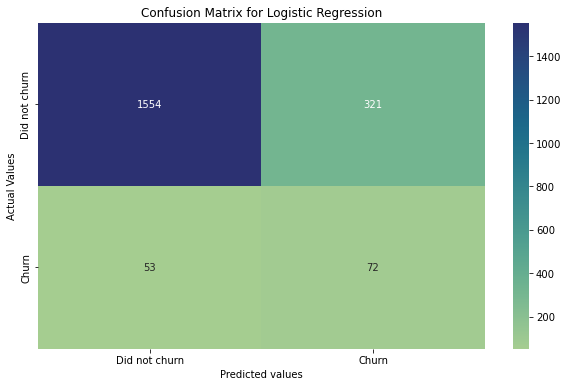

In [72]:
plot_cm(LR_model, 'Logistic Regression')

## Decision Tree Classification

In [62]:
parameters = {'model__criterion':['gini','entropy'],
              'model__max_depth':[2,4,8], 
              'model__max_features':[5,'sqrt','log2']}
tree_model = build_model(DecisionTreeClassifier(random_state=42), parameters)

In [63]:
evaluate(tree_model)

The best parameters are: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__max_features': 5}
The best score is: 0.841
The classification scores are:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1829
           1       0.32      0.73      0.44       171

    accuracy                           0.84      2000
   macro avg       0.64      0.79      0.67      2000
weighted avg       0.91      0.84      0.87      2000



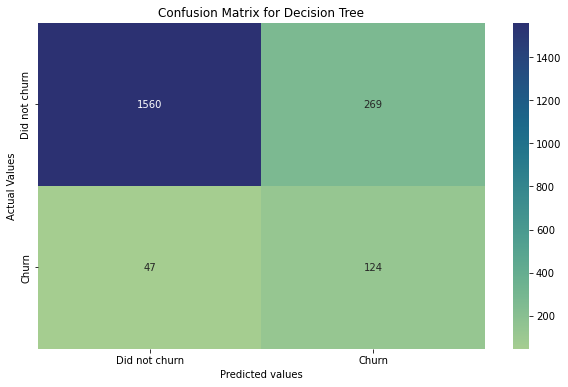

In [71]:
plot_cm(tree_model, 'Decision Tree')

## Random Forest Classification